## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 
#### Example 1: Identify drugs that has been approved or in-clinical-trial or in-test-for ovarian cancer


In [12]:
from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np


In [13]:
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
    # Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
    # Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
    # Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



53
(10580, 5)
(22129, 5)


In [11]:
metaKG

,API,Predicate,Subject,Object,URL
0,Text Mined Cooccurrence API,biolink:occurs_together_in_literature_with,biolink:AnatomicalEntity,biolink:AnatomicalEntity,https://cooccurrence.ci.transltr.io/query/
1,Text Mined Cooccurrence API,biolink:occurs_together_in_literature_with,biolink:AnatomicalEntity,biolink:BiologicalProcess,https://cooccurrence.ci.transltr.io/query/
2,Text Mined Cooccurrence API,biolink:occurs_together_in_literature_with,biolink:AnatomicalEntity,biolink:Cell,https://cooccurrence.ci.transltr.io/query/
3,Text Mined Cooccurrence API,biolink:occurs_together_in_literature_with,biolink:AnatomicalEntity,biolink:CellularComponent,https://cooccurrence.ci.transltr.io/query/
4,Text Mined Cooccurrence API,biolink:occurs_together_in_literature_with,biolink:AnatomicalEntity,biolink:ChemicalEntity,https://cooccurrence.ci.transltr.io/query/
...,...,...,...,...,...
22124,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:Disease,https://kg2cploverdb.ci.transltr.io/kg2c/query
22125,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:PhenotypicFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query
22126,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:NamedThing,biolink:BehavioralFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query
22127,RTX KG2 - TRAPI 1.5.0,biolink:applied_to_treat,biolink:ChemicalEntity,biolink:BehavioralFeature,https://kg2cploverdb.ci.transltr.io/kg2c/query


In [3]:
# Find everything that is connected to a specific node

In [ ]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('Ovarian cancer',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = APInames,
                                                                                            metaKG = metaKG,
                                                                                            API_predicates = API_predicates)     

MONDO:0008170
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
Automat-hmdb(Trapi v1.5.0): Success!
Automat-hetionet(Trapi v1.5.0): Success!
Automat-monarchinitiative(Tra

In [ ]:
result_ranked_by_primary_infores

,output_node,Name,Num_of_primary_infores,type_of_nodes,unique_predicates
28,CHEBI:45863,Paclitaxel,13,subject,[biolink:treats_or_applied_or_studied_to_treat...
33,CHEBI:28748,Doxorubicin,11,subject,[biolink:treats_or_applied_or_studied_to_treat...
39,CHEBI:27899,Cisplatin,10,subject,[biolink:treats_or_applied_or_studied_to_treat...
159,CHEBI:4672,Docetaxel,10,subject,"[biolink:causes, biolink:treats_or_applied_or_..."
46,CHEBI:63632,Topotecan,10,subject,"[biolink:treats, biolink:treats_or_applied_or_..."
...,...,...,...,...,...
1770,DRUGBANK:DB11430,Monensin,1,subject,[biolink:occurs_together_in_literature_with]
1771,DRUGBANK:DB02059,Adenosine-5-Diphosphoribose,1,subject,[biolink:occurs_together_in_literature_with]
1772,DRUGBANK:DB14904,Pimasertib,1,subject,[biolink:occurs_together_in_literature_with]
1773,DRUGBANK:DB12242,AZD-7762,1,subject,[biolink:occurs_together_in_literature_with]


NodeNorm does not know about these identifiers: UNII:Y8DGL9885E,UNII:17K7SN702N,UNII:RXG7T6RB8K,UNII:W2ZU1RY8B0,UNII:S4MK9TOL0D,UNII:JDS6958QAG,UNII:YR3G369F5A,RXCUI:1360071,UMLS:C0596087,RXCUI:1362058,RXCUI:1362063,RXCUI:1360291,RXCUI:1360332,RXCUI:1728053,RXCUI:1723743,UNII:RP9RQ0SOM8,UNII:8617Z5FMF6,UNII:HT3R7C012Q,UNII:NP6CFH3G8H,UNII:IZR558KO53,UNII:BPG11IF0HW,DRUGBANK:DB15060,REACT:R-ALL-9716874,REACT:R-ALL-9838650,UMLS:C0002073,UNII:ER09HM7LIR,UMLS:DC1135896,UMLS:DC0012155,MESH:C416023,MESH:C034483,RXCUI:1795154,RXCUI:1360341,UNII:R0835E18NH,RXCUI:1360489,UNII:4J2I0SN84Y,RXCUI:1360101,CHEBI:232540,MESH:C034868,RXCUI:1191498,RXCUI:1360321,RXCUI:1597593,RXCUI:1657069,UNII:4XTQ10247Y,UNII:3Z252A2K9G,DRUGBANK:DB04945
[Text(0.5, 0, 'Paclitaxel'), Text(2.5, 0, 'Cisplatin'), Text(4.5, 0, 'Topotecan'), Text(6.5, 0, 'Tamoxifen'), Text(8.5, 0, 'Trabectedin'), Text(10.5, 0, 'Niraparib'), Text(12.5, 0, 'Estradiol'), Text(14.5, 0, 'Bevacizumab'), Text(16.5, 0, 'cyclophosphamide hydrate'), Te

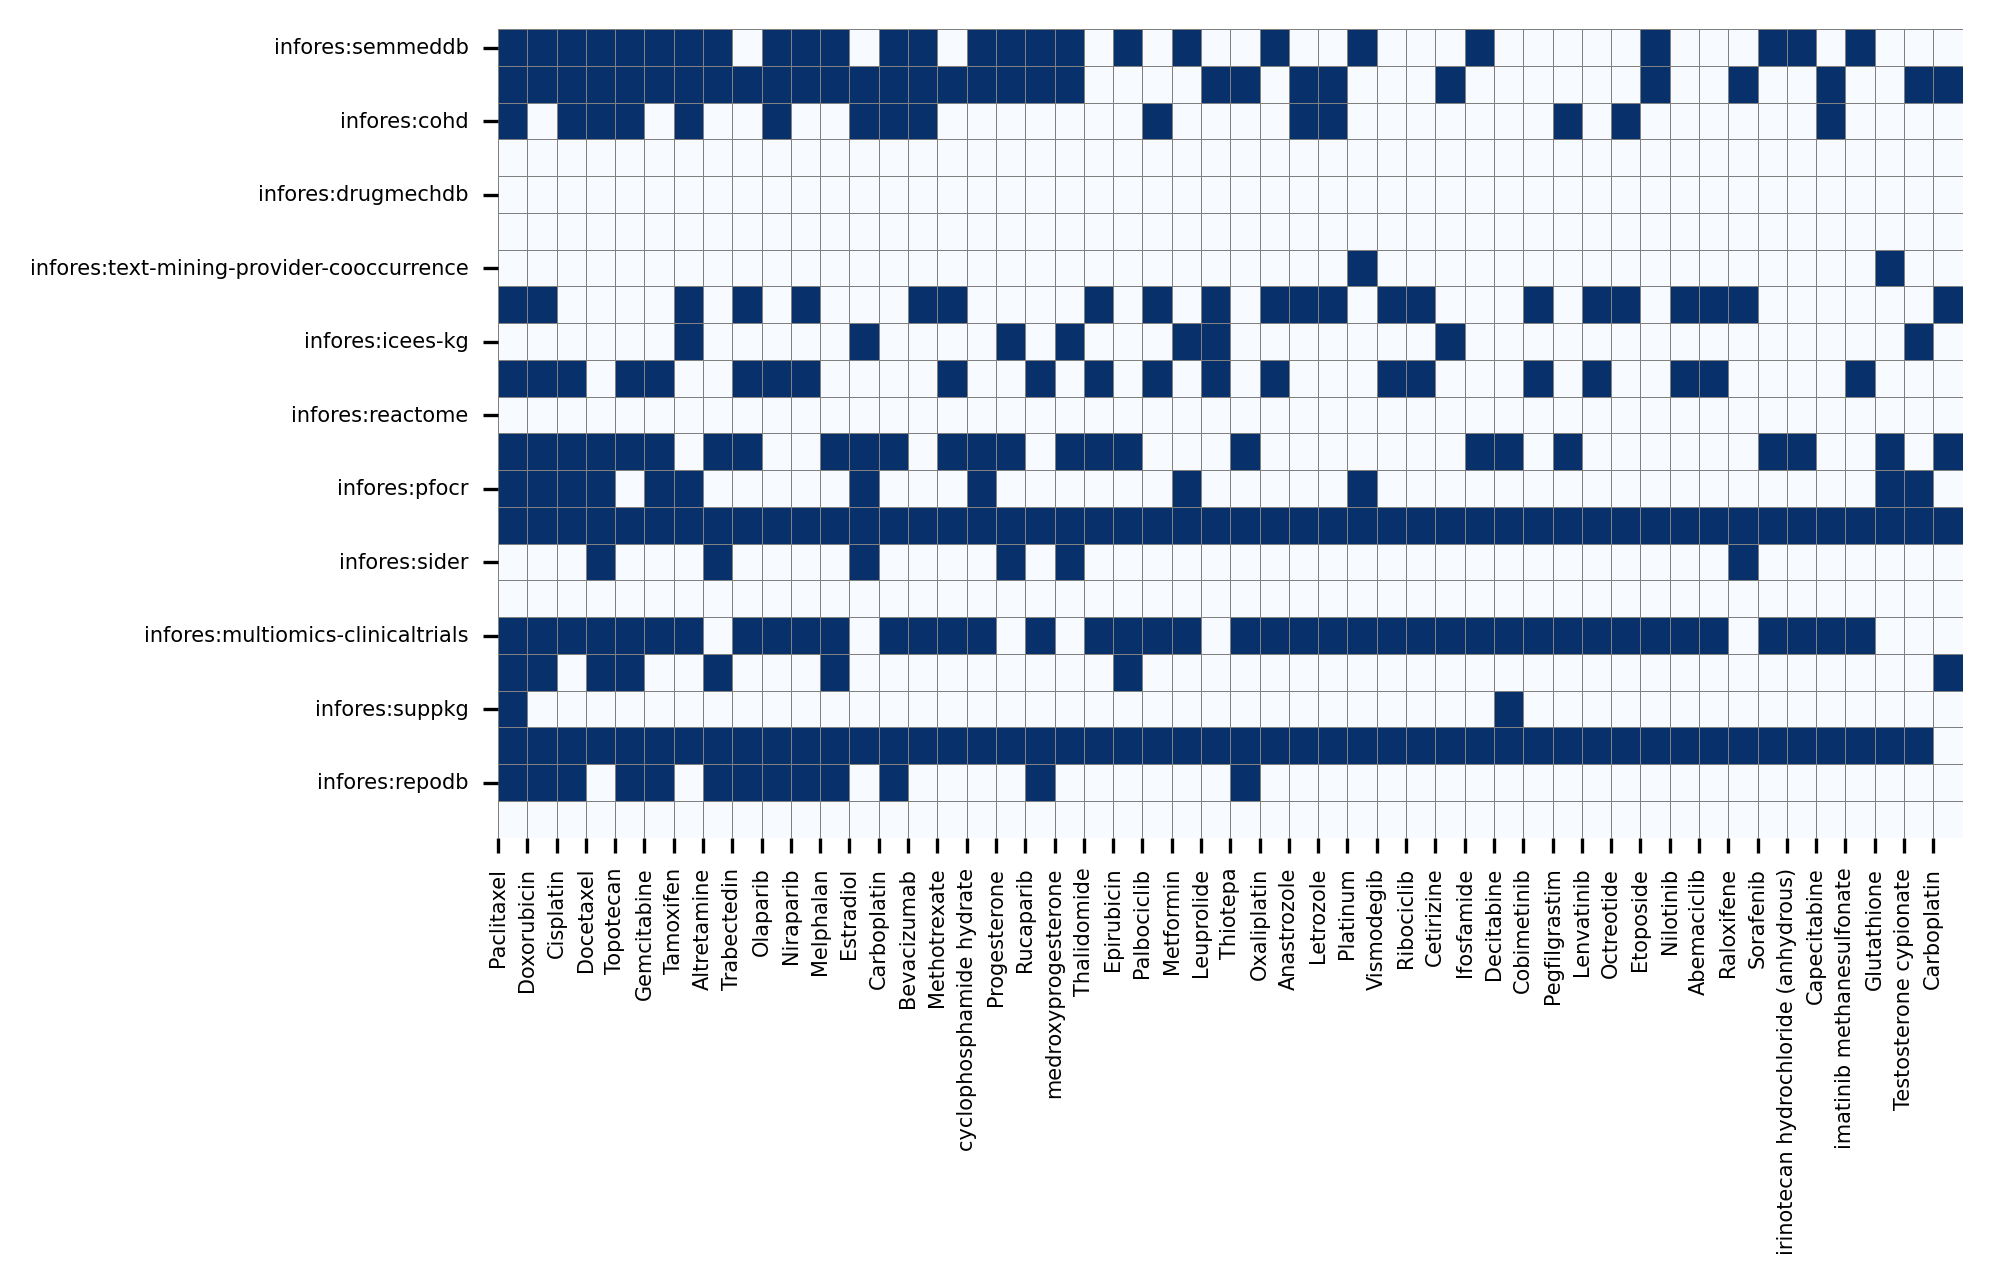

[Text(0.5, 0, 'Paclitaxel'), Text(2.5, 0, 'Cisplatin'), Text(4.5, 0, 'Topotecan'), Text(6.5, 0, 'Tamoxifen'), Text(8.5, 0, 'Trabectedin'), Text(10.5, 0, 'Niraparib'), Text(12.5, 0, 'Estradiol'), Text(14.5, 0, 'Bevacizumab'), Text(16.5, 0, 'cyclophosphamide hydrate'), Text(18.5, 0, 'Rucaparib'), Text(20.5, 0, 'Thalidomide'), Text(22.5, 0, 'Palbociclib'), Text(24.5, 0, 'Leuprolide'), Text(26.5, 0, 'Oxaliplatin'), Text(28.5, 0, 'Letrozole'), Text(30.5, 0, 'Vismodegib'), Text(32.5, 0, 'Cetirizine'), Text(34.5, 0, 'Decitabine'), Text(36.5, 0, 'Pegfilgrastim'), Text(38.5, 0, 'Octreotide'), Text(40.5, 0, 'Nilotinib'), Text(42.5, 0, 'Raloxifene'), Text(44.5, 0, 'irinotecan hydrochloride (anhydrous)'), Text(46.5, 0, 'imatinib methanesulfonate'), Text(48.5, 0, 'Testosterone cypionate')]


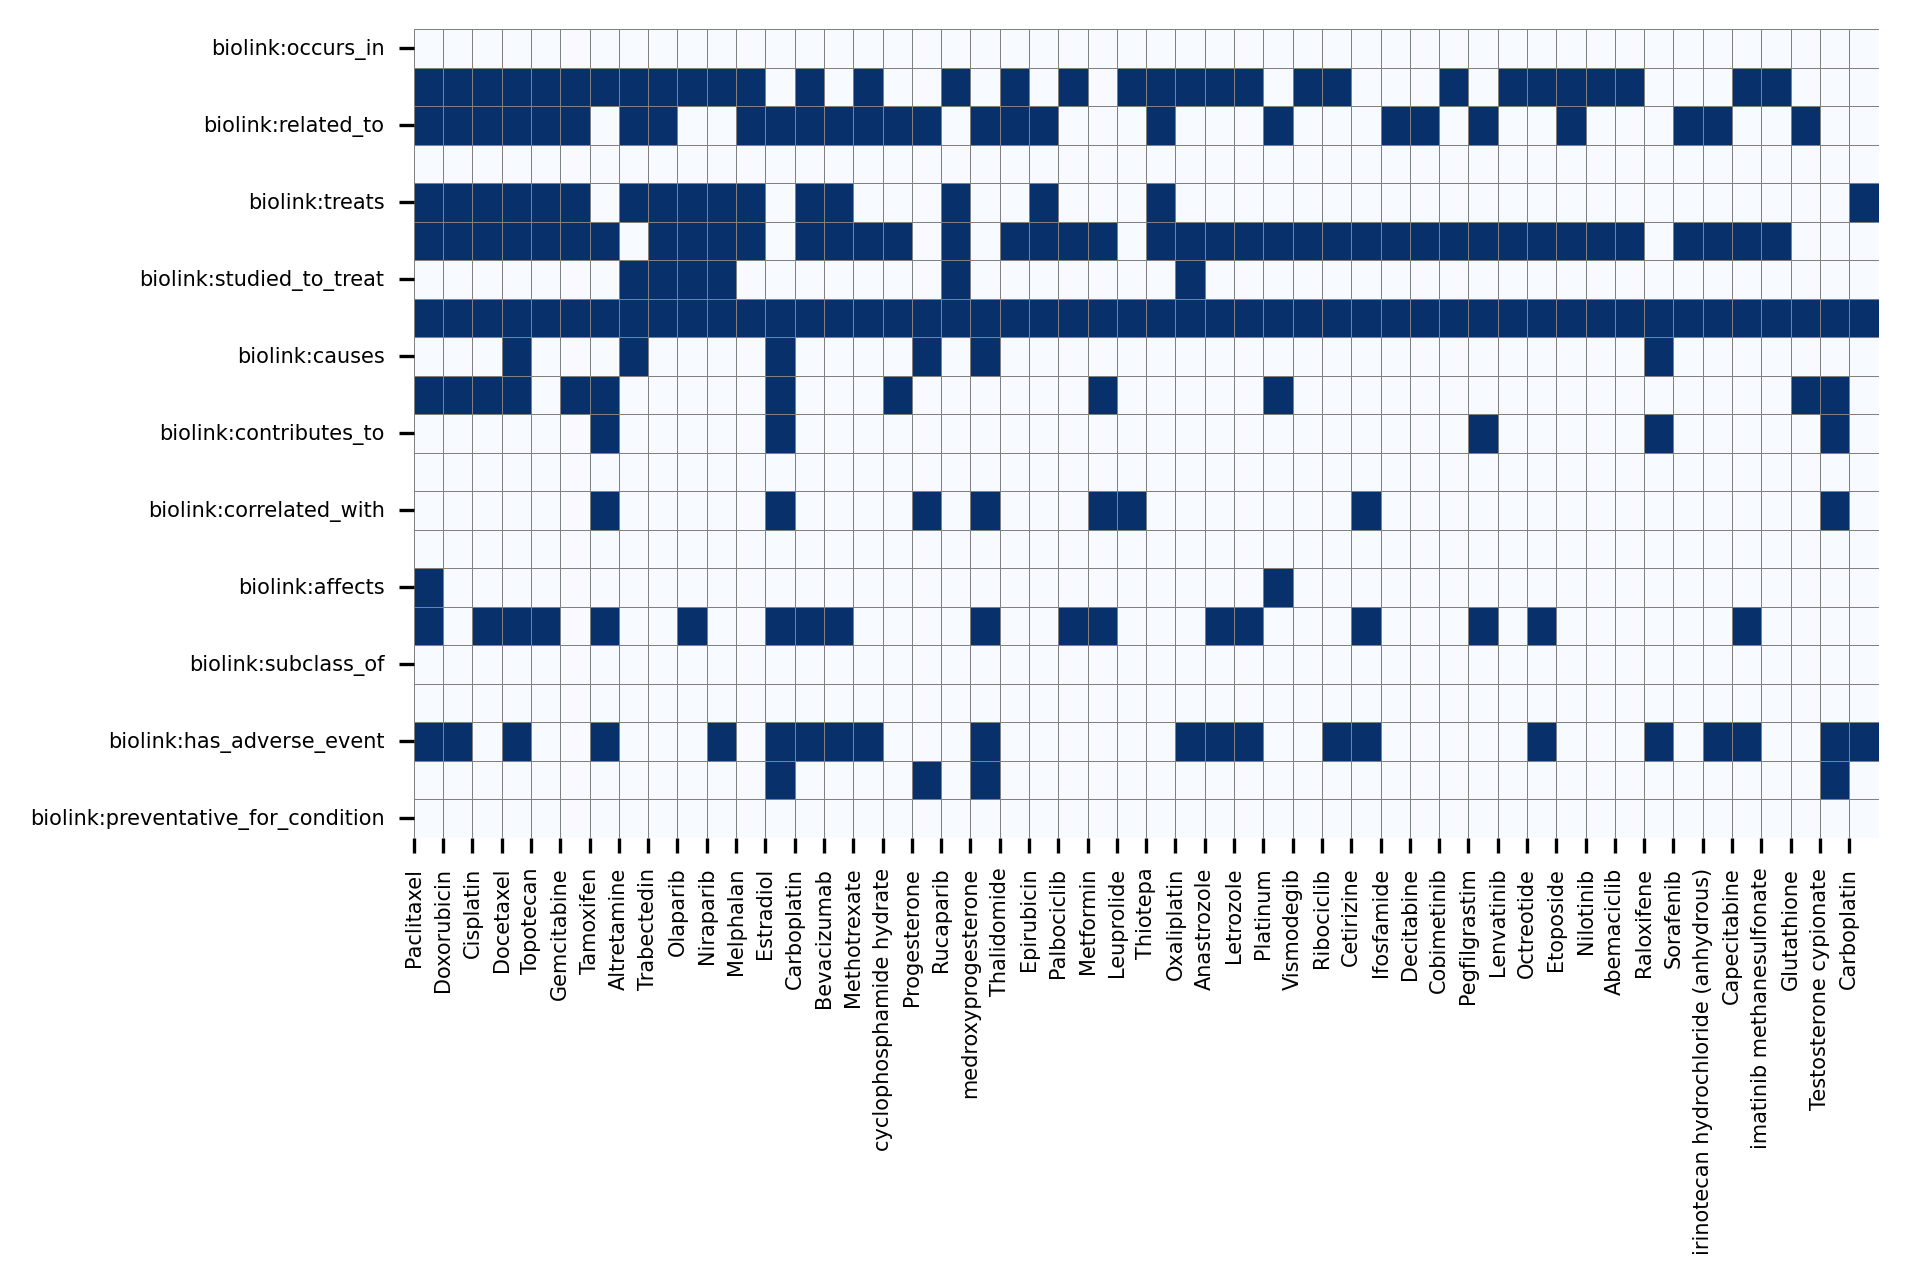

,Paclitaxel,Doxorubicin,Cisplatin,Docetaxel,Topotecan,Gemcitabine,Tamoxifen,Altretamine,Trabectedin,Olaparib,...,S-23,Isoflurane,Bendamustine,Quinacrine,Ixabepilone,Monensin,Adenosine-5-Diphosphoribose,Pimasertib,AZD-7762,Compound 18
biolink:occurs_in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:applied_to_treat,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:related_to,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
biolink:predisposes_to_condition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:treats,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:in_clinical_trials_for,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:studied_to_treat,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:treats_or_applied_or_studied_to_treat,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
biolink:causes,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:occurs_together_in_literature_with,1,1,1,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

In [7]:
# End of the example
